In [172]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [174]:
df = pd.read_csv("/Users/matteo/Documents/PersonalProjects/airbnb-pricing-optimization/data/listings-1.csv")

# check for NAs
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood_group               7780
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1985
minimum_nights                       0
number_of_reviews                    0
last_review                       1870
reviews_per_month                 1870
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2647
dtype: int64

In [176]:
# Check for duplicate listings

df.duplicated().sum()

np.int64(0)

In [178]:
# create new data set that will be the clean version of df
df_clean = df

# save the observations with missing prices
df_missing_prices = df_clean[df_clean["price"].isna()]

# remove entries with missing prices
df_clean = df_clean[df_clean["price"].isna() == False]

# define price outliers
Q1 = df_clean["price"].quantile(0.25)
Q3 = df_clean["price"].quantile(0.75)

upper_bound = Q3 + (1.5 * (Q3 - Q1))

df_clean["is_outlier"] = (df_clean["price"] > upper_bound)

# drop neighbourhood_group, as all entries have NAs
df_clean = df_clean.drop(columns = "neighbourhood_group")

# change all NA's in license to "None" because NA means that no license is present
df_clean["license"] = df_clean["license"].fillna("None")

# remove listing with no host name
df_clean = df_clean[df_clean["host_name"].isna() == False]

# last review NA's renamed to "No reviews"
df_clean["last_review"] = df_clean["last_review"].fillna("No reviews")

# reviews per month NA's changed to 0's
df_clean["reviews_per_month"] = df_clean["reviews_per_month"].fillna(0)

/var/folders/l3/nx1r6y2154j6kp9618n899p80000gn/T/ipykernel_19439/581472286.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [180]:
# check to make sure all NA's are handled

df_clean.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
is_outlier                        0
dtype: int64

In [182]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5794 entries, 0 to 7779
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5794 non-null   int64  
 1   name                            5794 non-null   object 
 2   host_id                         5794 non-null   int64  
 3   host_name                       5794 non-null   object 
 4   neighbourhood                   5794 non-null   object 
 5   latitude                        5794 non-null   float64
 6   longitude                       5794 non-null   float64
 7   room_type                       5794 non-null   object 
 8   price                           5794 non-null   float64
 9   minimum_nights                  5794 non-null   int64  
 10  number_of_reviews               5794 non-null   int64  
 11  last_review                     5794 non-null   object 
 12  reviews_per_month               5794 no

In [184]:
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,is_outlier
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,157.0,2,496,2025-08-16,2.53,1,224,41,STR-0006854,False
1,5858,Creative Sanctuary,8904,Philip Jonathon,Bernal Heights,37.74474,-122.42089,Entire home/apt,250.0,30,105,2017-08-06,0.53,1,357,0,None,False
2,8014,female HOST quiet fast internet market parking,22402,Jia,Outer Mission,37.73077,-122.44827,Private room,67.0,4,90,2025-07-03,0.57,3,42,1,STR-0000974,False
3,8142,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56.0,32,10,2023-07-30,0.07,20,362,0,None,False
4,8339,Historic Alamo Square Victorian,24215,Rosmarie,Western Addition,37.77377,-122.43614,Entire home/apt,527.0,9,25,2019-06-28,0.13,1,327,0,STR-0000264,False


/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


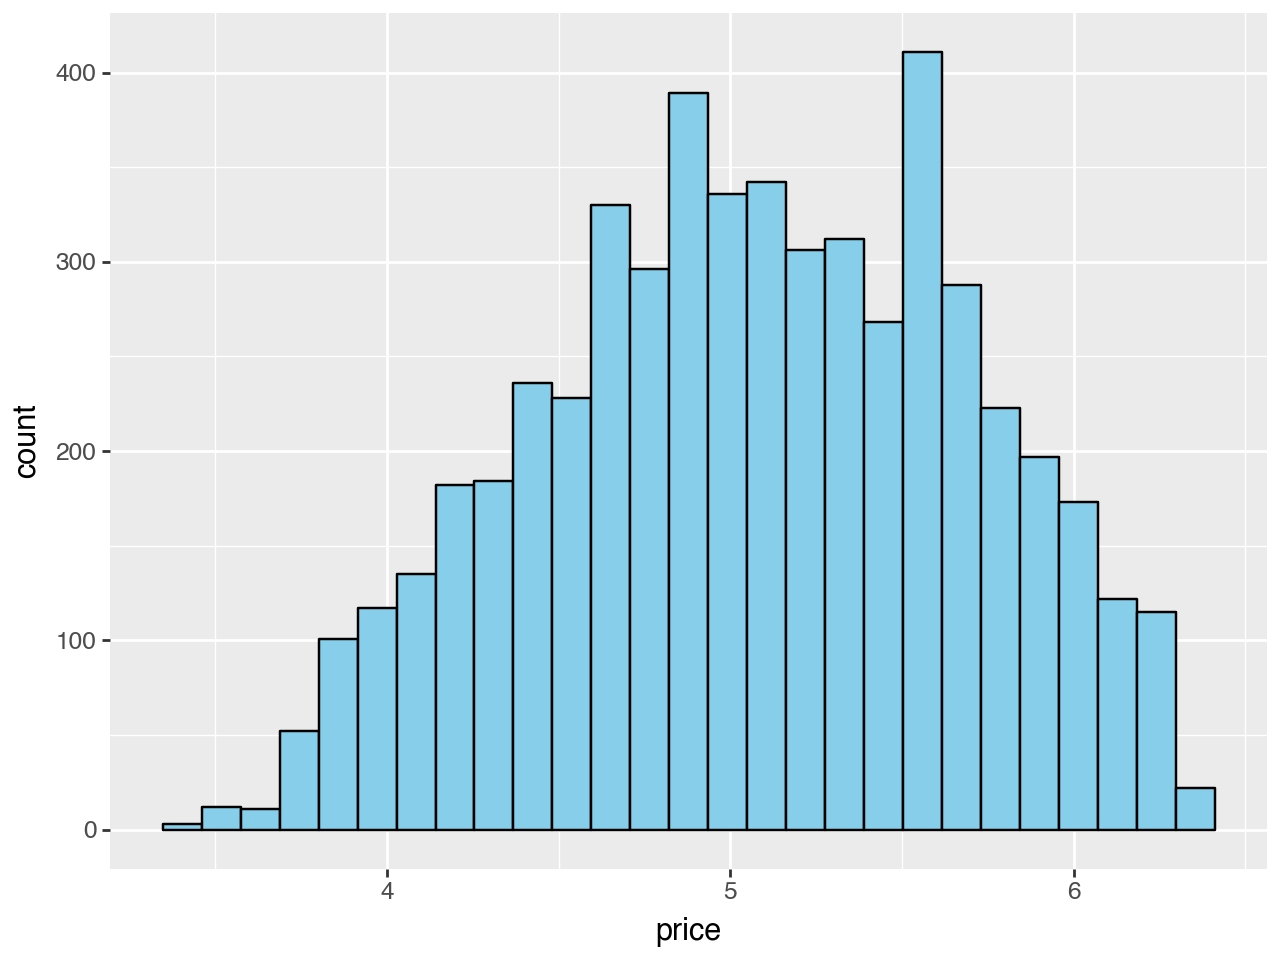

In [186]:
# testing log transform for price when outliers are removed

(
    ggplot(df_clean[df_clean["is_outlier"] == False], mapping = aes(x = np.log(df_clean[df_clean["is_outlier"] == False]["price"]))) +
           geom_histogram(fill = "skyblue", color = "black")
)

In [202]:
df_clean[df_clean["is_outlier"] == False].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5391 entries, 0 to 7779
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5391 non-null   int64  
 1   name                            5391 non-null   object 
 2   host_id                         5391 non-null   int64  
 3   host_name                       5391 non-null   object 
 4   neighbourhood                   5391 non-null   object 
 5   latitude                        5391 non-null   float64
 6   longitude                       5391 non-null   float64
 7   room_type                       5391 non-null   object 
 8   price                           5391 non-null   float64
 9   minimum_nights                  5391 non-null   int64  
 10  number_of_reviews               5391 non-null   int64  
 11  last_review                     5391 non-null   object 
 12  reviews_per_month               5391 no